# Régression linéaire avec Python


## Modélisation des données

### Introduction 

Étant donné un ensemble d'observations (des données "data"), on veut souvent condenser et résumer les données en l'adaptant à un modèle qui dépend de paramètres ajustables. Parfois, le modèle est simplement une fonction usuelle (un polynôme, une gaussienne...), et l'ajustement fournit les coefficients appropriés.


Une approche très générale a le paradigme suivant: on choisit ou on conçoit une fonction objectif (une fonction coût, on dit aussi une fonction de mérite) qui mesure l'accord entre les données et le modèle avec un choix particulier de paramètres. 


En statistiques fréquentistes, la fonction objectif est classiquement organisée de telle sorte que les petites valeurs représentent un accord étroit avec les données. Les bayésiens choisissent comme fonction objectif la probabilité des paramètres sachant les données (ou souvent leur logarithme), de sorte que des grandes valeurs de cette probabilité représentent un accord plus étroit avec les données.


- Dans les deux approches, les paramètres du modèle sont ensuite ajustés pour trouver un le meilleur extremum dans la fonction objectif, produisant les paramètres les mieux adaptés. Ainsi, le processus d'ajustement se formule sous la forme d'un problème d'optimisation (minimisation ou maximisation) en plusieurs dimensions.


Notons bien que la détermination des meilleurs paramètres ne marque pas la fin du processus d'ajustement car il y a des questions importantes qui vont au-delà de cette détermination. Les données ne sont généralement pas exactes, elles sont sujets à des erreurs de mesure (appelées bruit comme dans le contexte du traitement du signal). Ainsi, les données typiques ne corrspondent jamais exactement au modèle utilisé, même si ce modèle est correct. Alors nous avons besoin de moyens pour évaluer si le modèle est approprié ou non, c'est-à-dire que nous devons tester la qualité de l'ajustement avec les tests statistiques. Il est alors nécessaire de connaître la précision des paramètres déterminés à partir des données. 

Les fréquentistes cherchent à connaître les erreurs sur les paramètres optimaux. Les Bayésiens veulent trouver non seulement le maximum de la distribution de probabilités des paramètres mais aussi la distribution complète.


### Approche fréquentiste ou approche bayésienne

D'une manière générale, l'observation expérimentale consiste à collecter des données pour tester la validité d'une théorie ou d'une hypothèse qui se basent sur un modèle analytique dépendant de plusieurs paramètres. Pour ce faire, un estimateur est construit qui mesure l'accord entre les données et le modèle. 

L'approche est dénomée 'fréquentiste' si cet estimateur est construit de telle façon que son minimum global représente l'accord parfait, c'est-à-dire la solution recherchée avec une certaine erreur. Elle est nommée 'bayésienne' si l'estimateur représente une probabilité des paramètres pour lesquels son maximum global représente l'accord parfait, c'est-à-dire la solution avec une certaine probabilité. Par exemple, ces paramètres peuvent servir à extrapoler des mesures expérimentales dans un intervalle d'une grandeur statistique. 


Dans l'approche fréquentiste, la détermination d'un paramètre estimé $\alpha$ fait appel à la probabilité $p(X|\alpha)$ d'observer la mesure X pour une valeur de $\alpha$ donnée. Cette probabilité correspond à la fréquence d'occurrence de la mesure X si l'on répète l'expérience un grand nombre de fois. On définit alors la fonction du maximum de vraisemblance (likelihood) comme le produit des probabilités associées à chacune des expériences: 

$$ L(\alpha) = \Pi_{i=1}^N p(X_i|\alpha) $$ 

avec $p(X_i|\alpha)$ la fonction densité de probabilité de la mesure $X_i$ pour un $\alpha$. Quantitativement, on suppose que chaque mesure $X_i$ est affectée par une erreur aléatoire et distribuée selon une distribution gaussienne autour de la vraie valeur Y(X) avec la déviation standard $\sigma_i$ (l'erreur de ces distributions gaussiennes). La fonction du maximum de vraisemblance s'écrit alors:

$$ L(\alpha) = \Pi_{i=1}^N exp(-\frac{1}{2}.(\frac{Y_i - Y(X_i)}{\sigma_i})^2).dY$$

Finalement, le paramètre est estimé d'une manière qui assure sa valeur dans un intervalle de confiance qui représente conventionnellement 95% des cas possibles (ou d'autres valeurs comme 68%, 99.7%, etc.). Cette approche nécessite de construire des modèles paramétriques comme les distributions normales, de student ou de $\chi^2$.


L'approche Bayésienne considère le paramètre $\alpha$ comme une variable aléatoire à laquelle on peut associer une fonction densité de probabilité $p(\alpha|X)$, et que l'on peut contraindre grâce à la mesure X en utilisant le théorème de Bayes stipulant que 

$$ p(\alpha| X) = \frac{p(X|\alpha).p(\alpha)}{p(X)}$$ 

Le terme $p(\alpha)$ est la densité de probabilité de $\alpha$ à priori, aussi appelé 'prior'. Elle précède toute information sur X et doit être choisie arbitrairement. Dans ce cas, l'intervalle de confiance est construit suivant cette distribution. Cette approche considère l'inconnue comme un paramètre, le terme inconnu inclut par exemple l'information manquante ou les modèles non-identifiables et on s'intéresse à la vérification après l'identificationdes paramètres.


- Dans la vie réelle, afin d'éviter l'introduction d'un prior arbitraire qui pourrait biaiser l'estimation des paramètres, on peut choisir l'approche fréquentiste.



### Optimisation déterministe ou optimisation stochastique

L'optimisation est une branche des mathématiques qui a pour but de trouver la meilleure solution possible d'un problème donné. Par exemple, en mécanique comme un système en mouvement tend toujours vers la position qui lui permet de consommer le moins d'énergie possible, les mécanismes cherchent toujours les meilleurs paramètres qui optimisent la performance de leurs machines. 


En finance, les investisseurs sur les marchés financiers cherchent à constituer des portefolios qui évitent les risques excessifs tout en garantissant un taux de rentablité élevé, etc. D'une manière générale le problème peut se traduire sous la forme suivante:



- minimiser $f(x)$ soumis à $c_i(x) \leq b_i,i = 1,...,m$



où $x=(x_1,...,x_n)$ est un vecteur de paramètres du problème, la fonction $f:\mathbb{R}^n \rightarrow \mathbb{R}$ est l'estimateur (appelée aussi fonction objectif), les fonctions $c_i:\mathbb{R}^n \rightarrow \mathbb{R}, i = 1, ..., m$, sont les contraintes du problème, et les constantes $b_1, ..., b_m$ sont les limites, ou les bornes des contraintes. 


La solution du problème est le vecteur $x_s$ satisfaisant les inégalités suivantes:

$$ \forall z, c_1(z) \leq b_1, ..., c_m(z) \leq b_m, f(z) \geq f(x_s) $$


et est obtenue par la minimisation d'une fonction objectif d'une manière analytique.



En optimisation déterministe, les grandeurs pertinentes sont les vecteurs des paramètres x. Par contre en optimisation stochastique, les grandeurs pertinentes sont des lois de probabilités; pour cela les algorithmes utilisent des informations a priori sur les paramètres inconnus du modèle pour produire la solution du problème. De point de vue pratique, on classe généralement la qualité des algorithmes d'optimisation en fonction de leurs propriétés, comme la robustesse (qui qualifie la capacité de l'algorithme à trouver la solution pour plusieurs classes de problèmes différents et ceci en fonction des valeurs initiales raisonnables), l'efficacité (qui qualifie les ressources nécessaires en temps d'exécution ou bien en mémoire vive), la précision (qui identifie la capacité à fournir et à identifier la solution avec précision en réduisant la sensibilité aux différentes types des erreurs).


- Eu égard à la complexité de l'approche stochastique par rapport à celle déterministe et pour éviter l'introduction d'un prior arbitraire, le data-scientist peut choisir l'utilisation des algorithmes déterministes pendant le processus de minimisation de la fonction objectif.

- Notons que c'est contre intuitif de dire que les méthodes stochastiques sont les plus efficaces pendant le processus de minimisation! Par exemple, l'algorithme du gradient stochastique.




### Convexité d'une fonction


Comme nous verrons de le voir, les algorithmes d'optimisation font appel à de nombreux outils de l'analyse mathématique. Dans ce cadre, l'analyse convexe occupe une place capitale car un théorème important et néanmoins intuitif énonce que si un minimum est local pour une fonction convexe, il est automatiquement global. 



### Problème bien posé, problème mal posé

La classification de Hadamard 1902 : La classe de problèmes mal posés est identifiée pour la première fois par le mathématicien Jacques Hadamard en 1902 qui montre qu'un problème pour lequel une faible erreur arbitraire au niveau des conditions aux limites donne lieu à une grande erreur au niveau de la solution est un problème mal posé. Inversement, un problème de la physique mathématique est dit bien posé au sens d'Hadamard s'il satisfait aux 3 conditions suivantes:

- 1 La solution existe (cette condition exprime la cohérence du modèle mathématique); 

- 2 La solution est unique (cette condition fait que sa situation réelle est bien définie);

- 3 La solution est stable c'est-à-dire des faibles variations aléatoires des différents paramètres du problème comme les valeurs initiales, les conditions aux limites ou les coefficients du modèle n'induisent que des faibles variations de la solution.


Par exemple, loin de la charge le potentiel électrique induit par une charge électrique ponctuelle ou par une distribution volumique de charges électriques est le même alors que la mesure de l'amplitude du potentiel ne donne aucune information sur la nature de la distribution des charges électriques. On dit que le problème est mal posé. 


Conditionnement d'un problème: L'une des techniques de diagnostic du caractère bien ou mal posé d'un problème d'optimisation est donnée par le calcul du conditionnement de la matrice hessienne. Ce calcul mesure l'effet des petites erreurs sur la solution du problème. Il est mis en évidence par une perturbation des données initiales. Dans le cas d'un problème bien posé, les erreurs sur les données induisent des erreurs du même ordre de grandeur sur la solution. Un problème bien posé conduit à une valeur faible du conditionnement (proche de 1). Un problème mal posé conduit à une valeur élevée de conditionnement (>>1). 



Le conditionnement est défini pour un système linéaire A.x = b avec A une matrice inversible comme (ici $\lambda_{max}$ et $\lambda_{min}$ sont respectivement la plus grande valeur propre de A et la plus petite valeur propre de A.

$$cond(A) = \frac{\lambda_{max}}{\lambda_{min}} = ||A||.||A^{-1}||$$

la norme ||.|| étant choisie parmi:

- la norme 1: 

$$||A||_1 = max_j \sum_{i=1}^n |a_{ij}|$$

- la norme 2 ($\rho(A) = max|\lambda_i|$):

$$||A||_2 = \sqrt{ \rho(A^tA)}$$

- la norme de Froebenius avec $a_{ij}$ sont les coefficients de la matrice A:

$$||A||_{Froebenius} = \sqrt{\sum_{i,j} |a_{ij}|^2} $$

- la norme $\infty$ 

$$||A||_{\infty} = max_i \sum_{j=1}^n |a_{ij}|$$



Pour être rigoureux, un critère théorique du caractère mal conditionné des problèmes est généralement utilisé : des valeurs très grandes de cond(A). Ajoutons, qu'un problème peut être mathématiquement bien posé mais numériquement mal posé si la précision des calculs est de l'ordre de $10^{-10}$ mais peut redevenir bien posé si la précision est de l'ordre de $10^{-20}$. La précision numérique agit donc aussi sur le caractère du problème.














## Machine Learning en Python : Problème de régression

### Applications métier de la régression

- Analyses prédictives:

L'analyse prédictive, c'est-à-dire la prévision des opportunités et des risques futurs, est l'application la plus importante de l'analyse de régression en entreprise. L'analyse de la demande, par exemple, prédit le nombre d'articles qu'un consommateur achètera probablement. Cependant, la demande n'est pas la seule variable dépendante en ce qui concerne les entreprises. L'analyse de régression peut aller bien au-delà de la prévision de l'impact sur les revenus directs. Par exemple, nous pouvons prévoir le nombre d'acheteurs qui passeront devant un panneau d'affichage particulier et utiliser ces données pour estimer le maximum pour enchérir pour une publicité. Les compagnies d'assurance s'appuient fortement sur une analyse de régression pour estimer la solvabilité des assurés et un nombre possible de sinistres au cours d'une période donnée.


- Efficacité des opérations

Les modèles de régression peuvent également être utilisés pour optimiser les processus métier. Un directeur d'usine, par exemple, peut créer un modèle statistique pour comprendre l'impact de la température du four sur la durée de conservation des biscuits cuits dans ces fours. Dans un centre d'appels, nous pouvons analyser la relation entre les temps d'attente des appelants et le nombre de plaintes. La prise de décision fondée sur les données élimine les conjectures, les hypothèses et la politique d'entreprise du processus de la prise de décision. Cela améliore la performance de l'entreprise en mettant en évidence les domaines qui ont le plus d'impact sur l'efficacité opérationnelle et les revenus.

- Aide à la décision

Les entreprises d'aujourd'hui sont surchargées de données sur les finances, les opérations et les achats des clients. De plus en plus, les dirigeants s'appuient désormais sur l'analyse de données pour prendre des décisions commerciales éclairées, éliminant ainsi l'intuition. L'analyse de régression peut apporter un angle scientifique à la gestion de toute entreprise. En réduisant l'énorme quantité de données brutes en informations exploitables, l'analyse de régression ouvre la voie à des décisions plus intelligentes et plus précises. Cela ne signifie pas que l'analyse de régression est la fin de la pensée créatrice des gestionnaires. Cette technique agit comme un outil parfait pour tester une hypothèse avant de plonger dans l’exécution.

- Correction des erreurs:

La régression est non seulement excellente pour prêter un soutien empirique aux décisions de gestion, mais également pour identifier les erreurs de jugement. Par exemple, un gérant de magasin de détail peut penser que la prolongation des heures d’achat augmentera considérablement les ventes. Une analyse de régression peut toutefois indiquer que l’augmentation des revenus pourrait ne pas suffire à soutenir la hausse des dépenses d’exploitation en raison de l’allongement des heures de travail (telles que les frais de main-d’œuvre supplémentaires). Par conséquent, l'analyse de régression peut fournir un support quantitatif pour les décisions et éviter les erreurs dues aux intuitions du gestionnaire.

- Nouvelles idées

Au fil du temps, les entreprises peuvent collecter un volume important de données non organisées susceptibles de fournir des informations précieuses. Cependant, ces données sont inutiles sans une analyse appropriée. Les techniques d'analyse de régression peuvent trouver une relation entre différentes variables en découvrant des modèles qui étaient auparavant inaperçus. Par exemple, l'analyse des données provenant des systèmes de points de vente et des comptes d'achat peut mettre en évidence des tendances du marché, telles que l'augmentation de la demande pendant certains jours de la semaine ou à certains moments de l'année. Les décideurs en entreprise peuvent conserver leurs stocks optimaux ou des ressources humaines optimales avant que la demande ne s’amplifie en reconnaissant ces informations.


### Modélisation de données et Ajustement linéaire (Data Modeling and Linear Fitting)


#### Estimateur des moindres carrés (modèle linéaire sans erreurs)

Cet estimateur de a et b minimisent la somme des carrés des distances verticales entre les valeurs mesurées (ou expérimentales) de y et les valeurs prédites (avec le modèle linéaire $y = a + b * x$) des valeurs de y:

- Il s'agit de l'estimateur le plus simple dans le domaine de la régression linéaire, il est donné par la formule suivante:

$$ F(a,b) = \sum_{i=1}^n (y_i - (a+b*x_i))^2 $$

On dit aussi que la fonction $F(a,b)$ est une fonction de $\chi^2$ (et on lit chi 2).

Etant donné que l'estimateur est linéaire en a et b, on peut alors effectuer la minimisation analytiquement (avec le calcul). Ainsi, a et b sont donnés par les formules suivantes:

$$ \hat{a} = \frac{\sum_{i=1}^n y_i}{n} - \hat{b} * \frac{\sum_{i=1}^n y_i}{n}  = \bar{y} - \hat{b} * \bar{x}$$


$$ \hat{b} = \frac{\sum_{i=1}^n y_i * (x_i - \bar{x})}{\sum_{i=1}^n (x_i - \bar{x})^2}$$

* Implémentation en python du calcul analytique:

In [2]:
"""
Version 1
La fonction moy prend comme argument d'entrée une liste L
On initialise une variable s (pour somme) à 0
Avec une boucle for on parcourt la liste L et on calcule
sa somme.
Enfin, on divise s par n pour obtenir la valeur moyenne
"""


def moy1(L):
    s = 0
    for i in range(0,len(L)):
        s = s + L[i]
    return s/len(L)

In [3]:
"""
Version 2
On utilise la fonction sum pour calculer
la somme de la liste, puis on divise par
la longueur de cette liste i.e le nombre
des éléments de cette liste
"""
def moy2(L):
    s = sum(L)
    return s/len(L)

In [4]:
"""
Version 3
il suffit d'appeler la fonction mean
du module numpy
comme suit
"""
L = [i**2 for i in range(1000000)] # définition de la liste
import numpy as np # chargement du module
np.mean(L) # calcul de la moyenne

333332833333.50006

In [5]:
# Etude de performance (complexité temporelle):

N = 10000
L = [i**2 for i in range(N)]

%timeit moy1(L)

742 µs ± 5.06 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
%timeit moy2(L)

71.4 µs ± 1.34 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [7]:
%timeit np.mean(L)

668 µs ± 20.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
L = np.array(L)
%timeit np.mean(L)

23.7 µs ± 1.81 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [10]:
type(L)

numpy.ndarray

In [6]:
# la fonction Bchap pour calculer b chapeau

def Bchap(x,y):
    """
    Cette fonction prend à l'entrée deux
    listes x et y.
    On calcule la moyenne de x
    Puis b chapeau
    """
    xb = moy1(x)
    num = 0
    den = 0
    for i in range(0,len(x)):
        num = num + y[i]*(x[i] - xb)
        deb = den + (x[i] - xb)**2
    return num/den

In [5]:
def Achap(x,y):
    """
    Cette fonction utilise les deux listes
    x et y pour calculer a
    """
    return moy1(y) - Bchap(x,y)*moy1(x)

In [9]:
help(Achap) # utilisation des commentaires intelligents

Help on function Achap in module __main__:

Achap(x, y)
    Cette fonction utilise les deux listes
    x et y pour calculer a



In [14]:
%load_ext line_profiler
%lprun -f Achap Achap(x,y)
%lprun -f Bchap Bchap(x,y)

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


/home/ahmed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


Timer unit: 1e-06 s

Total time: 0.00017 s
File: <ipython-input-6-bf166e6f4201>
Function: Bchap at line 3

Line #      Hits         Time  Per Hit   % Time  Line Contents
     3                                           def Bchap(x,y):
     4                                               """
     5                                               Cette fonction prend à l'entrée deux
     6                                               listes x et y.
     7                                               On calcule la moyenne de x
     8                                               Puis b chapeau
     9                                               """
    10         1         22.0     22.0     12.9      xb = moy1(x)
    11         1          1.0      1.0      0.6      num = 0
    12         1          1.0      1.0      0.6      den = 0
    13         7          9.0      1.3      5.3      for i in range(0,len(x)):
    14         6         68.0     11.3     40.0          num = num + y[i]*(x[i

## Régression linéaire avec plusieurs méthoes

    - Scipy.Polyfit
    - Stats.linregress
    - Optimize.curve_fit
    - numpy.linalg.lstsq
    - statsmodels.OLS
    - Solution analytique avec Moore-Penrose generalized inverse ou simple multiplicative matrix inverse
    - sklearn.linear_model.LinearRegression
    
### Avec scipy.polyfit

In [1]:
import numpy as np

x = np.array([0,1,2,3,4,5])
y = np.array([0,0.8,0.9, 0.1,-0.8,-1])

print(x)
print(y)

[0 1 2 3 4 5]
[ 0.   0.8  0.9  0.1 -0.8 -1. ]


In [11]:
import scipy.interpolate as spinter

p1 = np.polyfit(x,y,1)
print(p1)

[-0.30285714  0.75714286]


In [12]:
import matplotlib.pyplot as plt

plt.plot(x,y,'o')
plt.plot(x,np.polyval(p1,x),'r-')

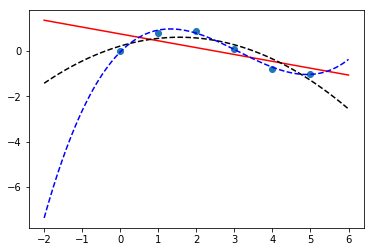

In [13]:
p2 = np.polyfit(x,y,2) # ordre 2
p3 = np.polyfit(x,y,3) # ordre 3
xp = np.linspace(-2,6,100)
plt.plot(x,y,'o')
plt.plot(xp,np.polyval(p1,xp),'r-')
plt.plot(xp,np.polyval(p2,xp),'k--')
plt.plot(xp,np.polyval(p3,xp),'b--')

In [14]:
#Goodness of fit stuy
#Etude d'adéquation d'ajustement

yfit = p1[0]*x + p1[1]

print(yfit)
print(y)

yresid = y - yfit

SSresid = sum(pow(yresid, 2))
SStotal = len(y) * np.var(y)

rsq = 1 - SSresid/SStotal

print(rsq)

import scipy.stats as spstats
slope, intercept, r_value, p_value, std_err = spstats.linregress(x,y)
print(pow(r_value,2))
print(p_value)


[ 0.75714286  0.45428571  0.15142857 -0.15142857 -0.45428571 -0.75714286]
[ 0.   0.8  0.9  0.1 -0.8 -1. ]
0.5177880184331798
0.5177880184331796
0.10693129655435198


In [36]:
from scipy import linspace, polyval, polyfit, sqrt, stats, randn, optimize
import statsmodels.api as sm
import matplotlib.pyplot as plt
import time
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
%matplotlib inline #uniquement pour jupyternotbook

In [16]:
# Generate random data of a sufficiently large size
#Sample data creation
#number of points 
n=int(5e6)
t=np.linspace(-10,10,n)
#parameters
a=3.25; b=-6.5
x=polyval([a,b],t)
#add some noise
xn=x+3*randn(n)

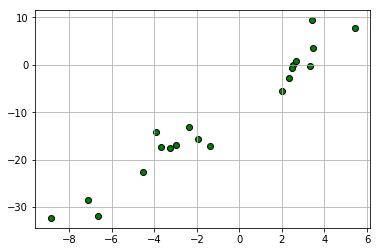

In [17]:
# Draw few random sample points and plot

xvar=np.random.choice(t,size=20)
yvar=polyval([a,b],xvar)+3*randn(20)
plt.scatter(xvar,yvar,c='green',edgecolors='k')
plt.grid(True)
plt.show()

In [41]:
n=int(5e6)
t=np.linspace(-10,10,n)
xvar=np.random.choice(t,size=20)
type(xvar)

numpy.ndarray

In [18]:
# First Method: Scipy.Polyfit


#Linear regressison -polyfit - polyfit can be used other orders polynomials
t1=time.time()
(ar,br)=polyfit(t,xn,1)
xr=polyval([ar,br],t)
#compute the mean square error
err=sqrt(sum((xr-xn)**2)/n)
t2=time.time()
t_polyfit = float(t2-t1)

print('Linear regression using polyfit')
print('parameters: a=%.2f b=%.2f, ms error= %.3f' % (ar,br,err))
print("Time taken: {} seconds".format(t_polyfit))

Linear regression using polyfit
parameters: a=3.25 b=-6.50, ms error= 2.999
Time taken: 1.1187751293182373 seconds


In [19]:
# Second Method Stats.linregress

#Linear regression using stats.linregress
t1=time.time()
(a_s,b_s,r,tt,stderr)=stats.linregress(t,xn)
t2=time.time()
t_linregress = float(t2-t1)

print('Linear regression using stats.linregress')
print('a=%.2f b=%.2f, std error= %.3f, r^2 coefficient= %.3f' % (a_s,b_s,stderr,r))
print("Time taken: {} seconds".format(t_linregress))

Linear regression using stats.linregress
a=3.25 b=-6.50, std error= 0.000, r^2 coefficient= 0.987
Time taken: 0.07953953742980957 seconds


In [20]:
# Third Method: Optimize.curve_fit

def flin(t,a,b):
    result = a*t+b
    return(result)

t1=time.time()
p1,_=optimize.curve_fit(flin,xdata=t,ydata=xn,method='lm')
t2=time.time()
t_optimize_curve_fit = float(t2-t1)

print('Linear regression using optimize.curve_fit')
print('parameters: a=%.2f b=%.2f' % (p1[0],p1[1]))
print("Time taken: {} seconds".format(t_optimize_curve_fit))

Linear regression using optimize.curve_fit
parameters: a=3.25 b=-6.50
Time taken: 0.6541647911071777 seconds


In [21]:
# Fourth Method: numpy.linalg.lstsq

t1=time.time()
A = np.vstack([t, np.ones(len(t))]).T
result = np.linalg.lstsq(A, xn)
ar,br = result[0]
err = np.sqrt(result[1]/len(xn))
t2=time.time()
t_linalg_lstsq = float(t2-t1)

print('Linear regression using numpy.linalg.lstsq')
print('parameters: a=%.2f b=%.2f, ms error= %.3f' % (ar,br,err))
print("Time taken: {} seconds".format(t_linalg_lstsq))

Linear regression using numpy.linalg.lstsq
parameters: a=3.25 b=-6.50, ms error= 2.999
Time taken: 0.1452951431274414 seconds


/home/ahmed/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """


In [22]:
# Fifth Method Statsmodels.OLS

t1=time.time()
t=sm.add_constant(t)
model = sm.OLS(x, t)
results = model.fit()
ar=results.params[1]
br=results.params[0]
t2=time.time()
t_OLS = float(t2-t1)

print('Linear regression using statsmodels.OLS')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_OLS))


Linear regression using statsmodels.OLS
parameters: a=3.25 b=-6.50
Time taken: 0.6416816711425781 seconds


In [23]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.315e+35
Date:                Wed, 26 Sep 2018   Prob (F-statistic):               0.00
Time:                        18:33:39   Log-Likelihood:             1.4326e+08
No. Observations:             5000000   AIC:                        -2.865e+08
Df Residuals:                 4999998   BIC:                        -2.865e+08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5000    3.9e-17  -1.67e+17      0.0

In [24]:
# Sixth Method Analytic solution using Moore-Penrose pseudoinverse

t1=time.time()
mpinv = np.linalg.pinv(t)
result = mpinv.dot(x)
ar = result[1]
br = result[0]
t2=time.time()
t_inv_matrix = float(t2-t1)

print('Linear regression using Moore-Penrose inverse')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_inv_matrix))

Linear regression using Moore-Penrose inverse
parameters: a=3.25 b=-6.50
Time taken: 0.2829911708831787 seconds


In [25]:
# Seventh Method Analytic solution using simple multiplicative matrix inverse

t1=time.time()
m = np.dot((np.dot(np.linalg.inv(np.dot(t.T,t)),t.T)),x)
ar = m[1]
br = m[0]
t2=time.time()
t_simple_inv = float(t2-t1)

print('Linear regression using simple inverse')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_simple_inv))

Linear regression using simple inverse
parameters: a=3.25 b=-6.50
Time taken: 0.09184598922729492 seconds


In [26]:
# Eighth Method: sklearn.linear_model.LinearRegression

t1=time.time()
lm = LinearRegression()
lm.fit(t,x)
ar=lm.coef_[1]
br=lm.intercept_
t2=time.time()
t_sklearn_linear = float(t2-t1)

print('Linear regression using sklearn.linear_model.LinearRegression')
print('parameters: a=%.2f b=%.2f'% (ar,br))
print("Time taken: {} seconds".format(t_sklearn_linear))

Linear regression using sklearn.linear_model.LinearRegression
parameters: a=3.25 b=-6.50
Time taken: 0.3832406997680664 seconds


/home/ahmed/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1717: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


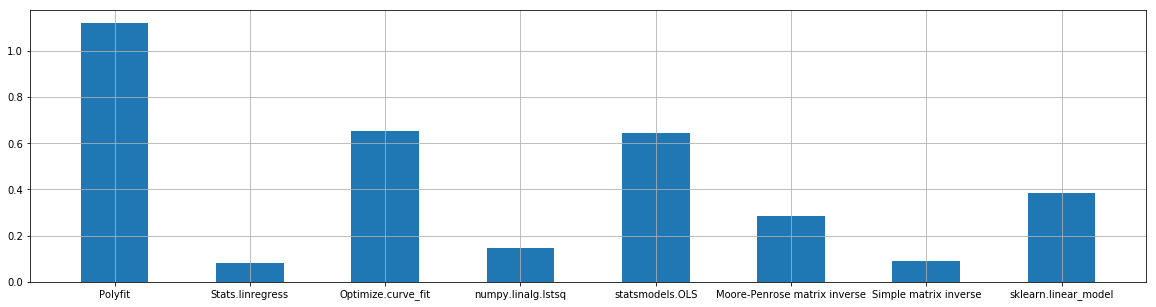

In [27]:
# Comparaison

times = [t_polyfit,t_linregress,t_optimize_curve_fit,t_linalg_lstsq,t_OLS,
         t_inv_matrix,t_simple_inv,t_sklearn_linear]


plt.figure(figsize=(20,5))
plt.grid(True)
plt.bar(left=[l*0.8 for l in range(8)],height=times, width=0.4,
        tick_label=['Polyfit','Stats.linregress','Optimize.curve_fit',
                    'numpy.linalg.lstsq','statsmodels.OLS','Moore-Penrose matrix inverse',
                    'Simple matrix inverse','sklearn.linear_model'])
plt.show()

In [28]:
n_min = 50000
n_max = int(1e7)
n_levels = 25
r = np.log10(n_max/n_min)
l = np.linspace(0,r,n_levels)
n_data = list((n_min*np.power(10,l)))
n_data = [int(n) for n in n_data]

In [11]:
#time_dict={'Polyfit':[],'Stats.lingress':[],'Optimize.curve_fit':[],'linalg.lstsq':[],'statsmodels.OLS':[],
          #'Moore-Penrose matrix inverse':[],'Simple matrix inverse':[], 'sklearn.linear_model':[]}

l1=['Polyfit', 'Stats.lingress','Optimize.curve_fit', 'linalg.lstsq', 
 'statsmodels.OLS', 'Moore-Penrose matrix inverse', 'Simple matrix inverse', 'sklearn.linear_model']
time_dict = {key:[] for key in l1}

from tqdm import tqdm

for i in tqdm(range(len(n_data))):
    t=np.linspace(-10,10,n_data[i])
    #parameters
    a=3.25; b=-6.5
    x=polyval([a,b],t)
    #add some noise
    xn=x+3*randn(n_data[i])
    
    #Linear regressison -polyfit - polyfit can be used other orders polynomials
    t1=time.time()
    (ar,br)=polyfit(t,xn,1)
    t2=time.time()
    t_polyfit = 1e3*float(t2-t1)
    time_dict['Polyfit'].append(t_polyfit)
    
    #Linear regression using stats.linregress
    t1=time.time()
    (a_s,b_s,r,tt,stderr)=stats.linregress(t,xn)
    t2=time.time()
    t_linregress = 1e3*float(t2-t1)
    time_dict['Stats.lingress'].append(t_linregress)
    
    #Linear regression using optimize.curve_fit
    t1=time.time()
    p1,_=optimize.curve_fit(flin,xdata=t,ydata=xn,method='lm')
    t2=time.time()
    t_optimize_curve_fit = 1e3*float(t2-t1)
    time_dict['Optimize.curve_fit'].append(t_optimize_curve_fit)
    
    # Linear regression using np.linalg.lstsq (solving Ax=B equation system)
    t1=time.time()
    A = np.vstack([t, np.ones(len(t))]).T
    result = np.linalg.lstsq(A, xn)
    ar,br = result[0]
    t2=time.time()
    t_linalg_lstsq = 1e3*float(t2-t1)
    time_dict['linalg.lstsq'].append(t_linalg_lstsq)
    
    # Linear regression using statsmodels.OLS
    t1=time.time()
    t=sm.add_constant(t)
    model = sm.OLS(x, t)
    results = model.fit()
    ar=results.params[1]
    br=results.params[0]
    t2=time.time()
    t_OLS = 1e3*float(t2-t1)
    time_dict['statsmodels.OLS'].append(t_OLS)
    
    # Linear regression using Moore-Penrose pseudoinverse matrix
    t1=time.time()
    mpinv = np.linalg.pinv(t)
    result = mpinv.dot(x)
    ar = result[1]
    br = result[0]
    t2=time.time()
    t_mpinverse = 1e3*float(t2-t1)
    time_dict['Moore-Penrose matrix inverse'].append(t_mpinverse)
    
    # Linear regression using simple multiplicative inverse matrix
    t1=time.time()
    m = np.dot((np.dot(np.linalg.inv(np.dot(t.T,t)),t.T)),x)
    ar = m[1]
    br = m[0]
    t2=time.time()
    t_simple_inv = 1e3*float(t2-t1)
    time_dict['Simple matrix inverse'].append(t_simple_inv)
    
    # Linear regression using scikit-learn's linear_model
    t1=time.time()
    lm = LinearRegression()
    lm.fit(t,x)
    ar=lm.coef_[1]
    br=lm.intercept_
    t2=time.time()
    t_sklearn_linear = 1e3*float(t2-t1)
    time_dict['sklearn.linear_model'].append(t_sklearn_linear)

NameError: name 'n_data' is not defined

In [30]:
df = pd.DataFrame(data=time_dict)
df

,Moore-Penrose matrix inverse,Optimize.curve_fit,Polyfit,Simple matrix inverse,Stats.lingress,linalg.lstsq,sklearn.linear_model,statsmodels.OLS
0,6.560087,7.441759,3.938913,0.763893,1.256466,2.277613,4.721880,8.647203
1,2.829552,9.070396,6.407022,0.836611,1.598358,1.704216,6.890774,10.274410
2,2.916336,9.343863,7.641077,1.012325,1.868486,1.964569,6.774426,9.809732
3,3.082514,14.203548,10.810137,0.992060,2.228260,2.466440,5.846739,13.081074
4,4.572392,14.830351,10.150671,1.427889,2.935648,3.037453,7.408619,12.907982
5,4.727602,17.816782,13.341904,1.634359,2.189398,3.411531,8.600235,16.020060
6,7.090330,19.863129,15.440702,2.409935,2.684116,4.060984,14.866829,19.793034
7,10.424137,31.008244,22.910357,3.078699,4.504919,6.034851,18.355370,36.296606
8,10.917187,36.738396,32.161474,3.438473,5.351067,8.021355,21.998644,32.415390
9,15.143156,43.850422,31.033754,4.468203,6.288528,7.948399,25.306940,42.842865


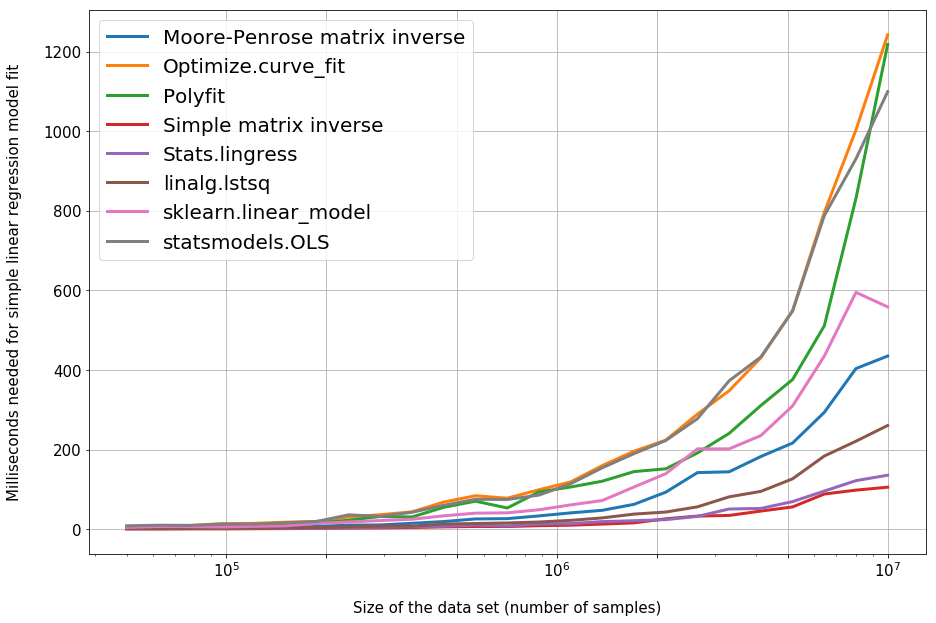

In [31]:
plt.figure(figsize=(15,10))
for i in df.columns:
    plt.semilogx((n_data),df[i],lw=3)
plt.xticks([1e5,2e5,5e5,1e6,2e6,5e6,1e7],fontsize=15)
plt.xlabel("\nSize of the data set (number of samples)",fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Milliseconds needed for simple linear regression model fit\n",fontsize=15)
plt.grid(True)
plt.legend([name for name in df.columns],fontsize=20)

In [32]:
a1=df.iloc[n_levels-1]

/home/ahmed/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1717: MatplotlibDeprecationWarning: The *left* kwarg to `bar` is deprecated use *x* instead. Support for *left* will be removed in Matplotlib 3.0
  return func(ax, *args, **kwargs)


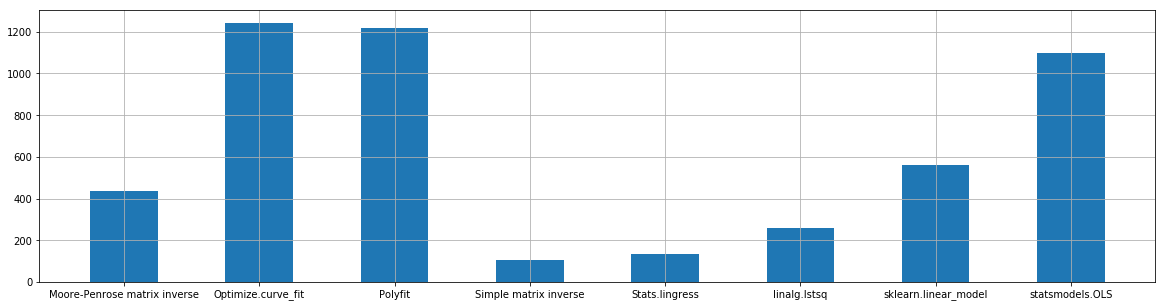

In [33]:
plt.figure(figsize=(20,5))
plt.grid(True)
plt.bar(left=[l*0.8 for l in range(8)],height=a1, width=0.4,
        tick_label=list(a1.index))
plt.show()